In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import sys
sys.path.append('../modeling')
from config import TRACKING_URI
import mlflow

# set the experiment id
mlflow.set_tracking_uri(TRACKING_URI)
mlflow.set_experiment(experiment_name='model_simple')
mlflow.autolog()

2025/06/06 11:49:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [3]:
df = pd.read_csv('../data/synth_combined.csv', index_col=0)
col_target = 'dropped_out'
X = df.drop(col_target, axis=1)
# MLFlow doesn't like a series for the target, so convert it to numpy - for sklearn it doesn't matter
y = df[col_target].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [4]:
encoder = OneHotEncoder(drop='first')
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.fit_transform(X_test)

2025/06/06 11:49:24 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ac82fdc181b84f108bd730defa3e813b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run thoughtful-cod-547 at: http://mlflow.fa.berufsnavigator.de/#/experiments/429379183992082117/runs/ac82fdc181b84f108bd730defa3e813b
🧪 View experiment at: http://mlflow.fa.berufsnavigator.de/#/experiments/429379183992082117


LogisticRegression()

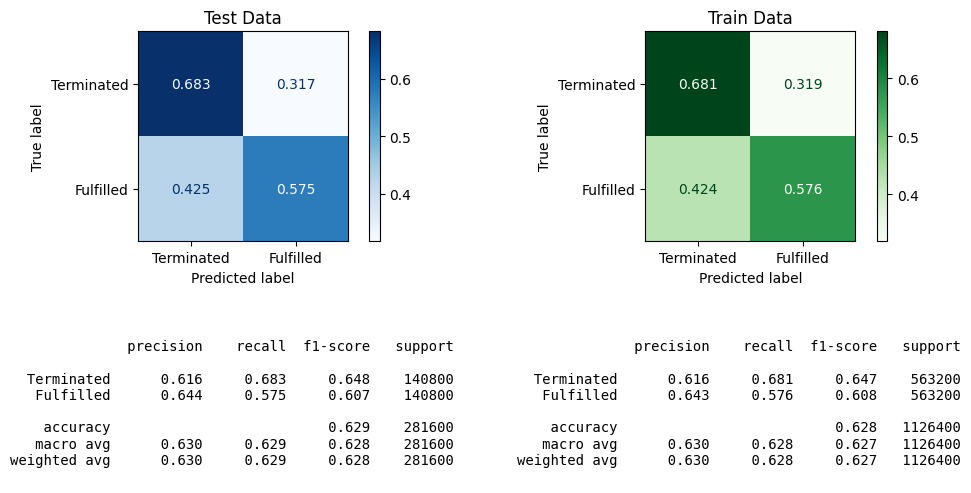

In [5]:
model = LogisticRegression()
model.fit(X_train_enc, y_train)

from utils import check_classification_binary
check_classification_binary(model, X_train_enc, X_test_enc, y_train, y_test, normalize='true')
model